# Week 12 Practical - Network Analysis

In this practical, we will form a small network using the connections between students in this prac, and then we'll look at a much
bigger network (passenger routes between Australian airports).

First import the Python modules we need: we'll need `math`, `networkx`, `pandas` and `matplotlib`.

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import math

### Class network exercise


Unless your SGTA leader has created another spreadsheet for you, use the following spreadsheet.

https://mqoutlook-my.sharepoint.com/:x:/g/personal/greg_baker_mq_edu_au/EZ0yJXjL_X5LjDXzugsItLYBou_OqkxoyNFC9exHXFyYyg?e=dOFU3t

Look for the worksheet tab with your prac group. Add a row with a pseudonym and the unit codes you are studying this semester (not including COMP2200/COMP6200).

When everyone has finished entering data, download the spreadsheet (File -> Create a copy -> Download).

Using `pandas`, load the spreadsheet and build a graph where each student is a node and an edge exists when two students share a unit other than COMP2200/COMP6200.)

If you get an error about `openpyxl` not being available, fix that with whatever tool you use to manage packages (`pip install openpyxl` or `uv add openpyxl` or `conda install openpyxl`)

These are the columns that contain each student's units.


In [5]:
unit_cols = ['Unit1', 'Unit2', 'Unit3', 'Unit4']

Create an empty graph.


In [7]:
G_classes = nx.Graph()

Add an edge between a student and each unit they study. You can do this by iterating over every element in `unit_cols` and creating an edge between the `'Name'` and that unit column.

In [ ]:
for unit in unit_cols:
    for name, u in zip(class_df['Name'], class_df[unit]):
        G_classes.add_edge(name, u)

Use `nx.shortest_path` to find the path between yourself and another student.


In [8]:
path = nx.shortest_path(G_classes, 'Gale', 'Harper')
print('Example shortest path from Gale to Harper:', path)

NodeNotFound: Source Gale is not in G

### Visualise the class network
Create a layout for the class network and draw it using Matplotlib.


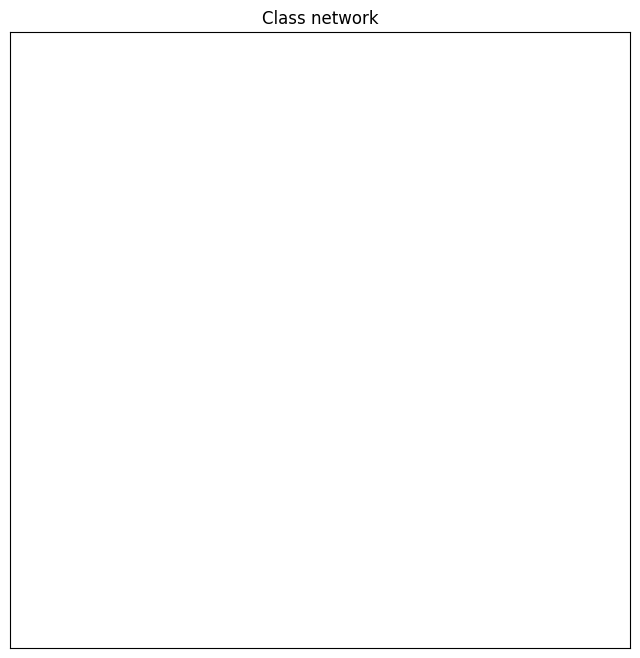

In [10]:
pos_class = nx.spring_layout(G_classes)
plt.figure(figsize=(8,8))
nx.draw_networkx(G_classes, pos=pos_class,node_size=20, alpha=0.7 )
plt.title('Class network')
plt.show()

# Characterise the network

Calculate the average clustering coefficient and the average shortest path length in the network, and calculate what $N$ and $log(N)$ are -- $N$ is the number of students and units (in total).

In [34]:
avg_clust_class =nx.average_clustering(G_classes)
print('Class network average clustering coefficient:', avg_clust_class)
if nx.is_conneccted(G_classes)
    avg_shortest_class = nx.average_shortest_path_length(G_classes)
else:
    subgraph = G_classes.subgraph(max(nx.connected_components(G_classes), key=len))
    avg_shortest_class = nx.average_shortest_class

SyntaxError: expected ':' (1002175673.py, line 7)

 Based on these metrics for your class network, does it look more like:
- a **random graph** (low clustering, average path around $\log(N)$)
- a **small world** network (high clustering, average path around $\log(N)$)
- a **chain** (average path grows with $N$, low clustering)
- or **other**?

_Answer here_

# Airport data

Downloaded from [https://www.bitre.gov.au/publications/ongoing/domestic_airline_activity-time_series](https://www.bitre.gov.au/publications/ongoing/domestic_airline_activity-time_series)

Read the Excel file (`TopRoutesJuly2014Feb2025.xlsx`) that lists the top airline routes. You'll need to specify the sheet name as "Top Routes" and skip the first 12 rows.


In [14]:
routes_df = pd.read_excel('TopRoutesJuly2014Feb2025.xlsx', sheet_name='Top Routes', skiprows=12)
routes_df


,City Pair Route,Unnamed: 1,Year,Month,Revenue,Aircraft,Rev Pax,Distance,RPKs,ASKs,...,Unnamed: 11,Revenue.1,Aircraft.1,Rev Pax.1,Unnamed: 15,RPKs.1,ASKs.1,Seats.1,Unnamed: 19,City Pair Route.1
0,Industry Domestic/Regional,NaN,NaN,NaN,Passengers,Trips (a),LF %,GC (klm),NaN,NaN,...,NaN,Passengers,Trips (a),LF %,NaN,NaN,NaN,NaN,NaN,NaN
1,ABX,SYD,2014.0,7.0,19747,589,65.807978,452,8925644.0,13563164.0,...,NaN,229468,6600,68.588611,NaN,103719536.0,151219764.0,334557.0,NaN,Albury - Sydney
2,ABX,SYD,2014.0,8.0,21085,573,69.183319,452,9530420.0,13775604.0,...,,229262,6581,68.368865,NaN,103626424.0,151569612.0,335331.0,,Albury - Sydney
3,ABX,SYD,2014.0,9.0,20138,536,67.486595,452,9102376.0,13487680.0,...,,228841,6553,67.894663,NaN,103436132.0,152347956.0,337053.0,,Albury - Sydney
4,ABX,SYD,2014.0,10.0,20620,545,67.90713,452,9320240.0,13724980.0,...,,228101,6520,67.366714,NaN,103101652.0,153045392.0,338596.0,,Albury - Sydney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,SYD,WGA,2024.0,10.0,15340,407,66.7,367,5629780.0,8440266.0,...,NaN,159398,4510,63.243638,NaN,58499066.0,92497946.0,252038.0,NaN,Sydney - Wagga Wagga
9226,SYD,WGA,2024.0,11.0,13852,379,67.118907,367,5083684.0,7574146.0,...,NaN,159632,4512,63.359609,NaN,58584944.0,92464182.0,251946.0,NaN,Sydney - Wagga\nWagga
9227,SYD,WGA,2024.0,12.0,12135,335,63.262434,367,4453545.0,7039794.0,...,NaN,159909,4509,63.384519,NaN,58686603.0,92588228.0,252284.0,NaN,Sydney - Wagga Wagga
9228,SYD,WGA,2025.0,1.0,10322,283,59.5,367,3788174.0,6364514.0,...,NaN,160857,4478,63.991359,NaN,59034519.0,92253891.0,251373.0,NaN,Sydney - Wagga Wagga


There is a column called "City Pair Route.1" which has the origin and destination airports.

- Drop the nulls
- Occasionally it has a newline character `'\n'` instead of a space, so replace those
- Drop the duplicates

In [15]:
routes_df = routes_df.dropna(subset=['City Pair Route.1'])
routes_df['City Pair Route.1'] = routes_df['City Pair Route.1'].str.replace('\n', ' ')
routes_df = routes_df.drop_duplicates(subset=['City Pair Route.1'])


C:\Users\pc\AppData\Local\Temp\ipykernel_25052\4083205573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  routes_df['City Pair Route.1'] = routes_df['City Pair Route.1'].str.replace('\n', ' ')


Create a graph for the airport network.


In [16]:
# Create an empty graph
G_airports = nx.Graph()

# Extract the city pairs and add edges to the graph
for route in routes_df['City Pair Route.1']:
    origin, destination = route.split(' - ')
    G_airports.add_edge(origin, destination)

# Print basic info about the network
print(f"Number of airports (nodes): {G_airports.number_of_nodes()}")
print(f"Number of routes (edges): {G_airports.number_of_edges()}")


Number of airports (nodes): 42
Number of routes (edges): 79


Add an edge for each flight. You will need to iterate over the values in the flights column and split the string on ' - '

In [17]:
# Add edges to the graph based on city pairs
for route in routes_df['City Pair Route.1']:
    origin, destination = route.split(' - ')
    G_airports.add_edge(origin, destination)


Check how many airports and routes are in the network.

In [18]:
# Print information about the airport network
print(f"Number of airports (nodes): {G_airports.number_of_nodes()}")
print(f"Number of routes (edges): {G_airports.number_of_edges()}")


Number of airports (nodes): 42
Number of routes (edges): 79


### Visualise the graph


Create a layout for the network visualization.


In [19]:
# Create a spring layout for better visualization
pos_airports = nx.spring_layout(G_airports)


Draw the nodes and edges using Matplotlib.


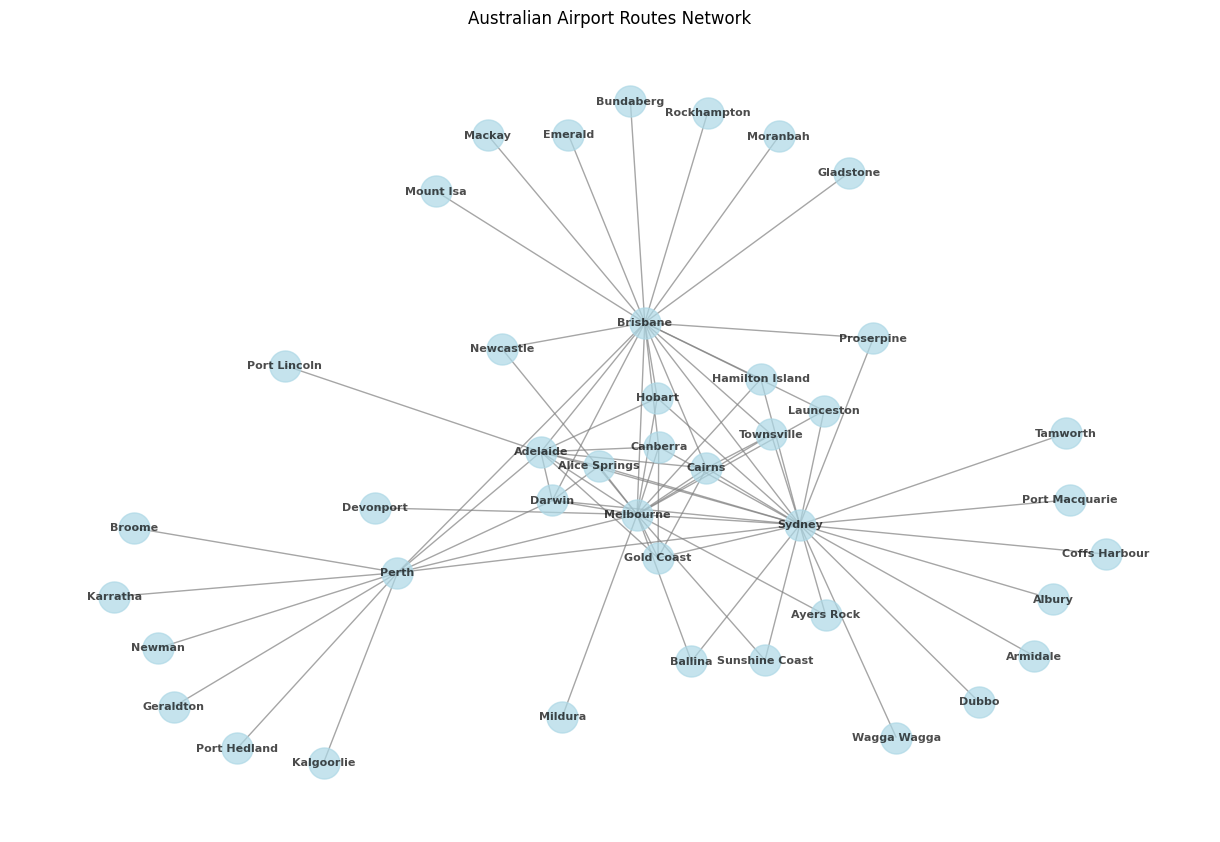

In [20]:
plt.figure(figsize=(12, 8))
nx.draw(G_airports, pos_airports,
        node_color='lightblue',
        node_size=500,
        width=1,
        with_labels=True,
        font_size=8,
        font_weight='bold',
        edge_color='gray',
        alpha=0.7)
plt.title('Australian Airport Routes Network')
plt.show()


### Average clustering and path length


Calculate the average clustering coefficient.


Based on the notebook content and the request, I'll calculate the average clustering coefficient for the airport network.



In [21]:
avg_clustering = nx.average_clustering(G_airports)
print(f"Average clustering coefficient: {avg_clustering:.4f}")

# Calculate N and log(N) for comparison
N = G_airports.number_of_nodes()
log_N = math.log(N)
print(f"N: {N}")
print(f"log(N): {log_N:.4f}")

Average clustering coefficient: 0.3481
N: 42
log(N): 3.7377


In [22]:
# Calculate average shortest path length for the largest connected component
if nx.is_connected(G_airports):
    avg_path_length = nx.average_shortest_path_length(G_airports)
else:
    largest_cc = max(nx.connected_components(G_airports), key=len)
    largest_subgraph = G_airports.subgraph(largest_cc)
    avg_path_length = nx.average_shortest_path_length(largest_subgraph)

print(f"Average shortest path length: {avg_path_length:.4f}")


Average shortest path length: 2.2857


Find the average shortest path length. For disconnected graphs, use the largest connected component.


In [23]:
# Calculate average shortest path length for the largest connected component
if nx.is_connected(G_airports):
    avg_path_length = nx.average_shortest_path_length(G_airports)
else:
    largest_cc = max(nx.connected_components(G_airports), key=len)
    largest_subgraph = G_airports.subgraph(largest_cc)
    avg_path_length = nx.average_shortest_path_length(largest_subgraph)

print(f"Average shortest path length: {avg_path_length:.4f}")


Average shortest path length: 2.2857


Calculate $N$ and $log(N)$

Based on the last two outputs, does this airport network look more like:
- a **random graph** (low clustering, average path around $\log(N)$)
- a **small world** network (high clustering, average path around $\log(N)$)
- a **chain** (average path grows with $N$, low clustering)
- or **other**?

_Answer here_

### Is it a scale-free (ultra small world) distribution?

Calculate the degree of each airport and plot the distribution on a log scale.

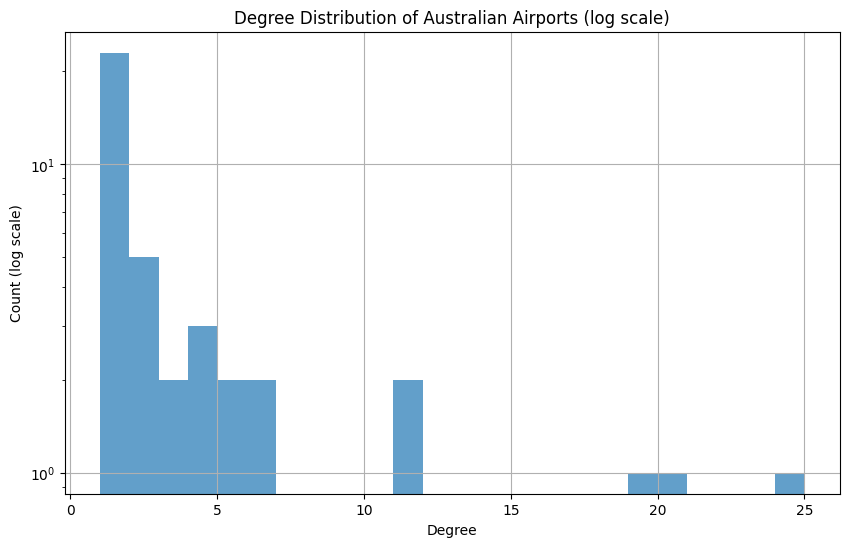

In [28]:
# Calculate degrees of each airport
degrees = dict(G_airports.degree())
degree_vals = list(degrees.values())

# Create the degree distribution plot on log scale
plt.figure(figsize=(10, 6))
plt.hist(degree_vals, bins=range(min(degree_vals), max(degree_vals) + 2, 1),
         log=True, alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Count (log scale)')
plt.title('Degree Distribution of Australian Airports (log scale)')
plt.grid(True)
plt.show()


Does the log-log graph look linear?

_Answer here_

### Centrality measures


Define a helper function to show the top airports for a metric.


Compute degree centrality. It returns a dictionary; it is often convenient to turn it into a Series and only show the top few.


In [29]:
def show_top_airports(metric_dict, n=5):
    """Show the top n airports for a given metric"""
    series = pd.Series(metric_dict)
    return series.nlargest(n)


# Calculate and display degree centrality
degree_cent = nx.degree_centrality(G_airports)
print("Top airports by degree centrality:")
print(show_top_airports(degree_cent))


Top airports by degree centrality:
Sydney       0.585366
Brisbane     0.487805
Melbourne    0.463415
Adelaide     0.268293
Perth        0.268293
dtype: float64


Compute betweenness centrality.


In [30]:
# Calculate and display betweenness centrality
betweenness_cent = nx.betweenness_centrality(G_airports)
print("Top airports by betweenness centrality:")
print(show_top_airports(betweenness_cent))


Top airports by betweenness centrality:
Sydney       0.422825
Brisbane     0.367927
Perth        0.274390
Melbourne    0.206362
Adelaide     0.068760
dtype: float64


Compute closeness centrality.


In [31]:
# Calculate and display closeness centrality
closeness_cent = nx.closeness_centrality(G_airports)
print("Top airports by closeness centrality:")
print(show_top_airports(closeness_cent))


Top airports by closeness centrality:
Sydney       0.706897
Brisbane     0.661290
Melbourne    0.650794
Adelaide     0.577465
Perth        0.577465
dtype: float64


Compute PageRank.


In [32]:
# Calculate and display PageRank
pagerank = nx.pagerank(G_airports)
print("Top airports by PageRank:")
print(show_top_airports(pagerank))


Top airports by PageRank:
Sydney       0.141525
Brisbane     0.121660
Melbourne    0.104674
Perth        0.075995
Adelaide     0.059703
dtype: float64


Compute eigenvector centrality.


In [35]:
# Calculate and display eigenvector centrality
eigenvector_cent = nx.eigenvector_centrality(G_airports)
print("Top airports by eigenvector centrality:")
print(show_top_airports(eigenvector_cent))


Top airports by eigenvector centrality:
Sydney       0.428276
Melbourne    0.400700
Brisbane     0.365404
Adelaide     0.307111
Darwin       0.221616
dtype: float64


Based on the centrality measures above, which airport is the most **central** or influential in this network?

Sydney appears as the most central airport across all centrality measures, making it the most central and influential airport in this network.


There are differences in the **second** most central node. What is that reflecting?

In [ ]:
*Your answer here.*

### Ego network of the center of the network

We can get a bit of an understanding of the core of the network by picking a very central node and then creating an ego network from it.

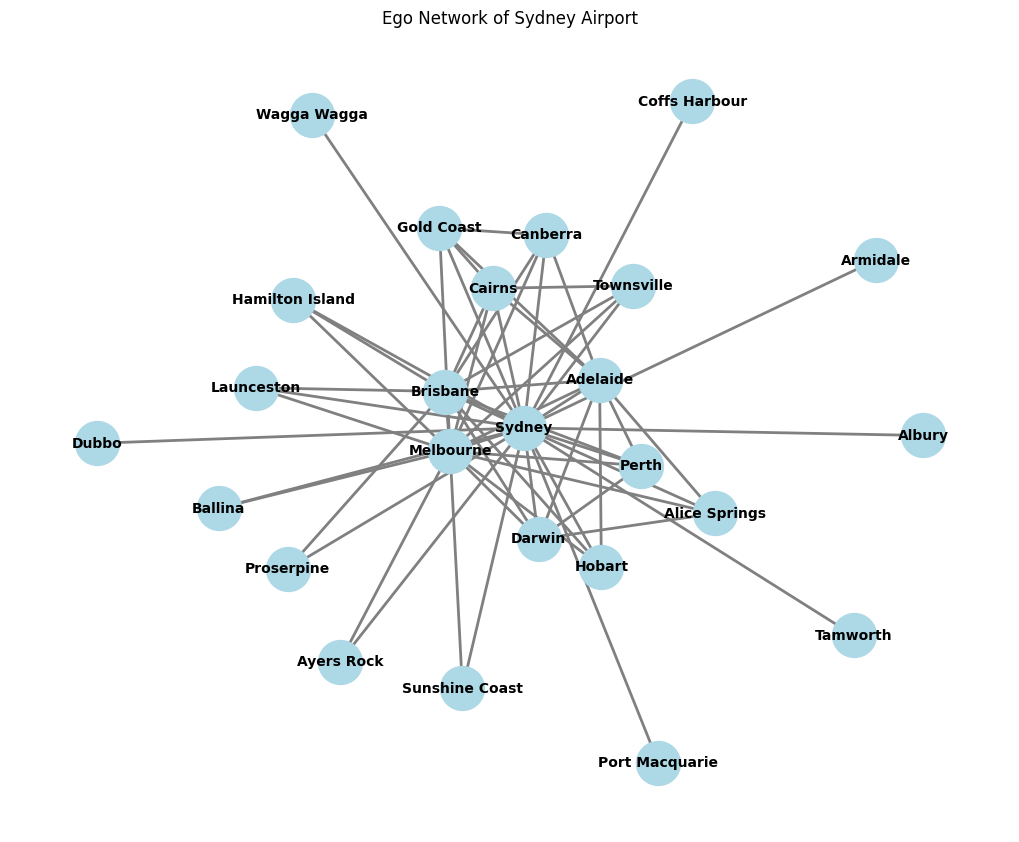

In [37]:
# Create an ego network centered on Sydney (most central airport)
ego_network = nx.ego_graph(G_airports, 'Sydney', radius=1)

# Create a spring layout and visualize the ego network
pos_ego = nx.spring_layout(ego_network)
plt.figure(figsize=(10, 8))
nx.draw(ego_network, pos_ego,
        node_color='lightblue',
        node_size=1000,
        width=2,
        with_labels=True,
        font_size=10,
        font_weight='bold',
        edge_color='gray')
plt.title("Ego Network of Sydney Airport")
plt.show()


### Try an alternate visualisation of the ego network


Draw the same ego network using a shell layout.


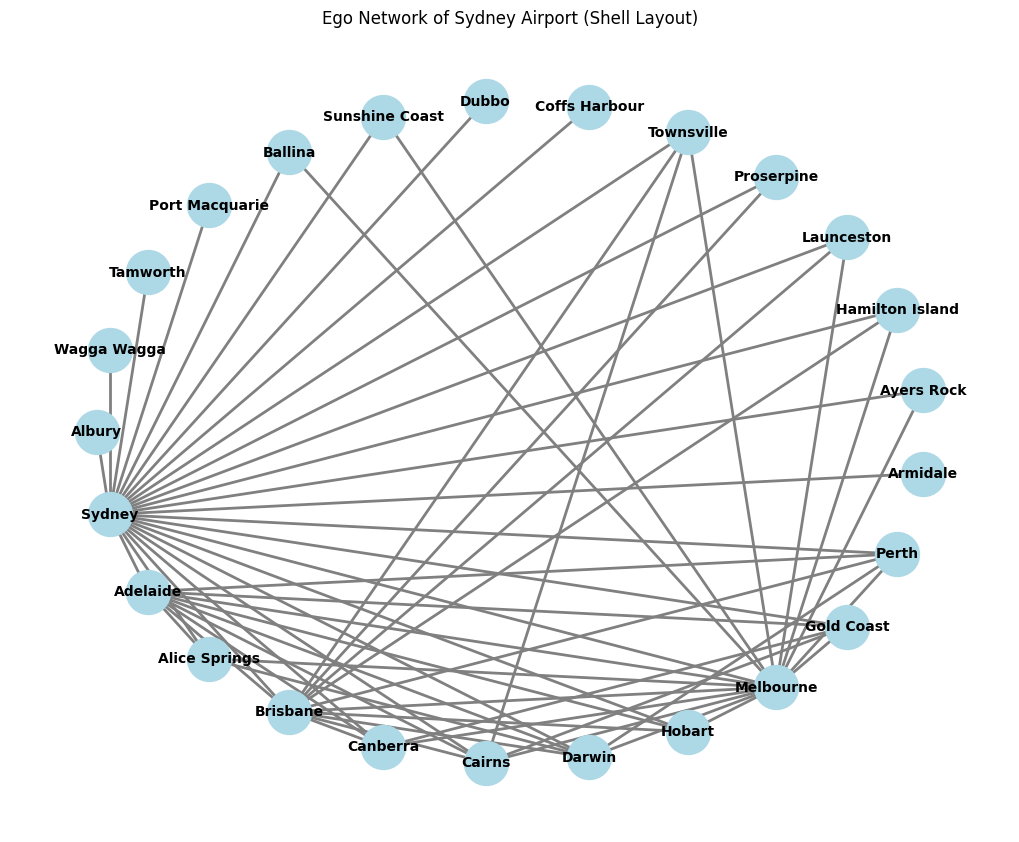

In [38]:
# Create a shell layout and visualize the ego network
pos_ego = nx.shell_layout(ego_network)
plt.figure(figsize=(10, 8))
nx.draw(ego_network, pos_ego,
        node_color='lightblue',
        node_size=1000,
        width=2,
        with_labels=True,
        font_size=10,
        font_weight='bold',
        edge_color='gray')
plt.title("Ego Network of Sydney Airport (Shell Layout)")
plt.show()


### Community detection

Sometimes we don't want to focus on the core of the network -- sometimes we want to get an overview of the whole network.

Run greedy modularity to find communities.


Number of communities detected: 5


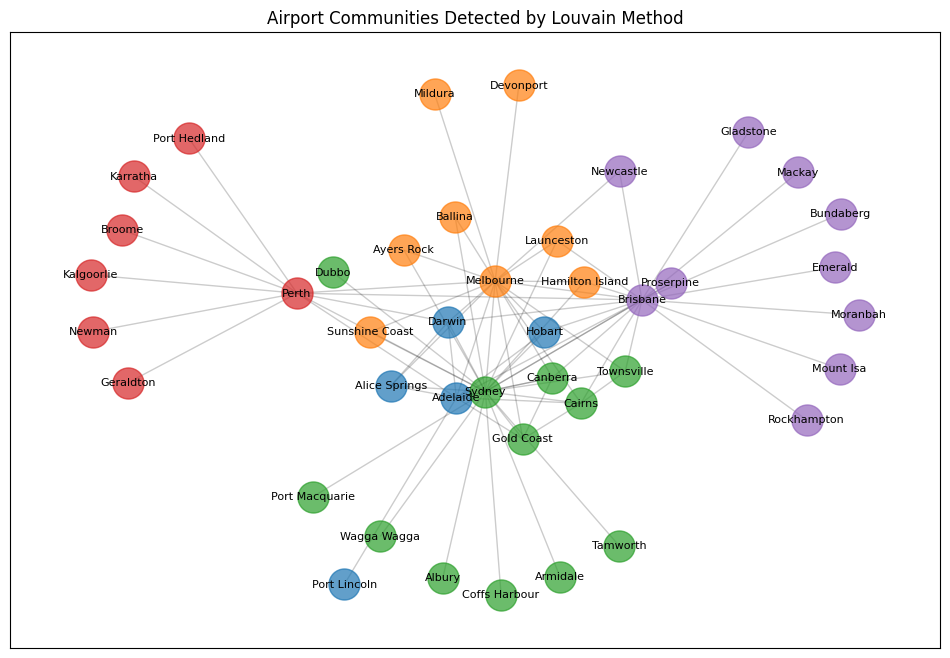

In [39]:
# Use the Louvain method to detect communities
communities = nx.community.louvain_communities(G_airports)

# Print the number of communities
print(f"Number of communities detected: {len(communities)}")

# Draw the network with different colors for each community
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_airports)

# Draw nodes colored by community
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G_airports, pos,
                           nodelist=community,
                           node_color=[f'C{i}'],
                           node_size=500,
                           alpha=0.7)

# Draw edges
nx.draw_networkx_edges(G_airports, pos, alpha=0.2)

# Add labels
nx.draw_networkx_labels(G_airports, pos, font_size=8)

plt.title('Airport Communities Detected by Louvain Method')
plt.show()


Print the number of communities and their members.


In [40]:
# Print the number of communities and their members
print(f"Number of communities: {len(communities)}\n")
print("Communities members:")
for i, community in enumerate(communities):
    print(f"\nCommunity {i + 1}:")
    print(sorted(list(community)))


Number of communities: 5

Communities members:

Community 1:
['Adelaide', 'Alice Springs', 'Darwin', 'Hobart', 'Port Lincoln']

Community 2:
['Ayers Rock', 'Ballina', 'Devonport', 'Hamilton Island', 'Launceston', 'Melbourne', 'Mildura', 'Sunshine Coast']

Community 3:
['Albury', 'Armidale', 'Cairns', 'Canberra', 'Coffs Harbour', 'Dubbo', 'Gold Coast', 'Port Macquarie', 'Sydney', 'Tamworth', 'Townsville', 'Wagga Wagga']

Community 4:
['Broome', 'Geraldton', 'Kalgoorlie', 'Karratha', 'Newman', 'Perth', 'Port Hedland']

Community 5:
['Brisbane', 'Bundaberg', 'Emerald', 'Gladstone', 'Mackay', 'Moranbah', 'Mount Isa', 'Newcastle', 'Proserpine', 'Rockhampton']


### Submission

Don't forget to submit this practical for marking.